EVALUACION 3

Sánchez Domínguez Carlos Antonio


In [2]:
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

Problema 1:

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.

True


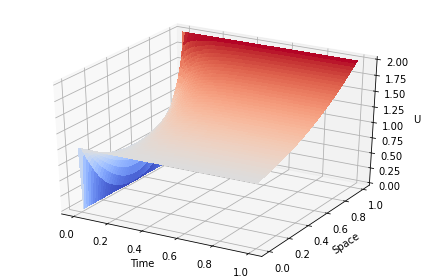

In [6]:
#Backward method to solve 1D reaction-diffusion equation:
#    u_t = D * u_xx + alpha * u
    
#with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
#and initial condition u(x,0) = 4*x - 4*x**2


M = 50 # GRID POINTS on space interval
N = 200 # GRID POINTS on time interval
#Utilicé estos pasos para obtener mejor resultado, ya que no cambiaba considerablemente con datos más grandes
x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 1

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1 # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#Condicion inicial
U[:,0] = 0.0

#----- Dirichlet boundary conditions -----
#aplicamos las condiciones 
U[0,:] = 1.0 
U[-1,:] = 2.0 


for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# verificamos si la solucion es correcta
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

X1=X                       
T1=T                      
U1=U                       


ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()

plt.show()

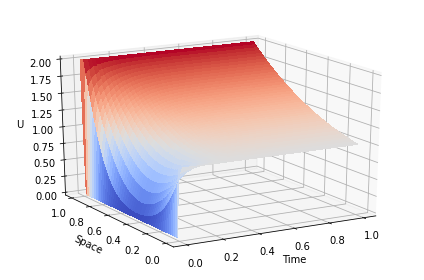

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
ax.view_init(20, -120)
plt.show()

Problema 2:

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$ y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.

True


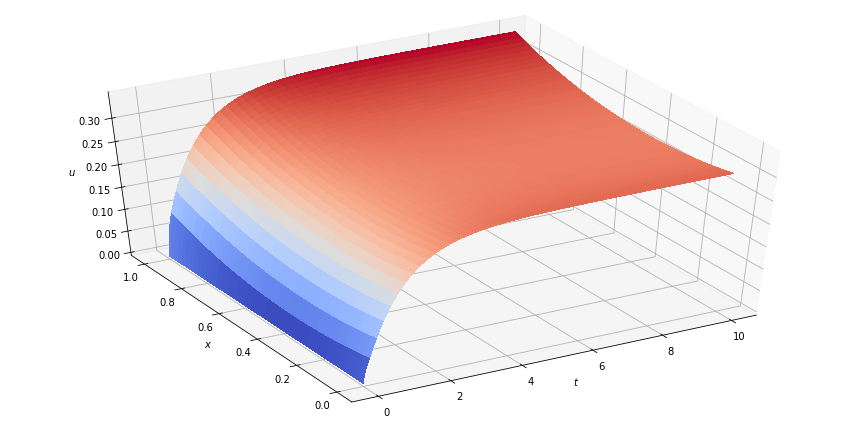

In [14]:

M=100 # Puntos en el Espacio x
N = 300 # Puntos en el Tiempo t
# Discretización de x
x0=0
xL=1
dx=(xL-x0)/(M-1)
# Discretización de t
t0=0
tF=10
dt=(tF-t0)/(N-1)
# Coeficiente de Difución
D=1
# Coeficiente de Reacción
alpha=-1 
r=dt*D/dx**2
s=dt*alpha
p=1+2*r-s
# Malla
xspan=np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N) 
main_diag=p*np.ones((1, M))
off_diag=-r*np.ones((1, M-1))
a=main_diag.shape[1]
diagonals=[main_diag, off_diag, off_diag]
A=sparse.diags(diagonals, [0, -1, 1], shape=(a, a)).toarray()
A[0, 1]=-2*r
A[M-1, M-2]=-2*r
# Matriz de Inicialización
U=np.zeros((M, N))
# Condiciones Iniciales
U[:,0]=0.0
# Condiciones de Frontera de Neumann 
f=0.1*np.ones([N+1, 1]) # En x=0 para cualquier tiempo vale 0.1
# rightBC = np.arange(1, N+1)
g=0.2*np.ones([N+1, 1]) # En x=0 para cualquier tiempo vale 0.1

for k in range(1, N):
  c=np.zeros((M-2, 1)).ravel()
  b=np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
  b1=np.insert(b, 1, c)
  b2=np.array(U[0: M, k-1])
  B=b1+b2 
  U[0:M, k]=np.linalg.solve(A,B)  
# Verificamos que la solución sea correcta
gc=np.allclose(np.dot(A, U[0: M, N-1]), B)
print(gc)
# Graficamos
X, T=np.meshgrid(tspan, xspan)
fig=plt.figure(figsize=(12, 6))
ax=fig.gca(projection="3d")
surf=ax.plot_surface(X, T, U, linewidth=0, cmap=cm.coolwarm , antialiased=False)

ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
ax.set_zlabel("$u$") 
plt.tight_layout()
ax.view_init(elev=45, azim=-120)

plt.show()

Observamos que la concentracion aumenta y llega a estar estabilizado en 0. 

Problema 3:

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso.

True


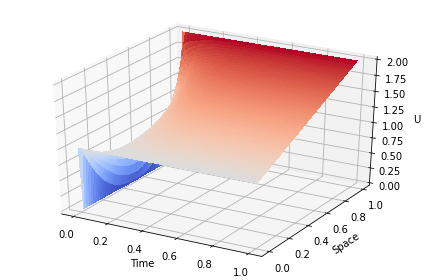

In [19]:
#Backward method to solve 1D reaction-diffusion equation:
#    u_t = D * u_xx + alpha * u
    
#with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
#and initial condition u(x,0) = 4*x - 4*x**2

#Discretizando de x y t
M = 50 # GRID POINTS on space interval  #Cantidad de puntos en el espacio
N =200 # GRID POINTS on time interval #Puntos en el tiempo


x0 = 0
xL = 1
#Largo de tubo
#discretización espacial 
dx = (xL - x0)/(M - 1)
#Paso en el espacio
t0 = 0
tF = 1
#Limite de tiempo

dt = (tF - t0)/(N - 1)
#Paso en el tiempo
D = 1 # Diffusion coefficient
alpha = 0 # Reaction rate
#Coeficientes de difusion y reaccion

r = dt*D/dx**2
s = dt*alpha;

#Creamos la malla
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

#Creamos la matriz tridiagonal en los proximos pasos
main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))


#Condicion inicial
U[:,0] = 0.0 #inicialmente vacio

#Condiciones de frontera de Dirichlet 
U[0,:] = 1.0 #condicion de u(0,t)=1
U[-1,:] = 2.0 #condicion en la frontera L=2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2 
    U[1:M-1, k] = np.linalg.solve(A,b) 

# verificamos si la solución es correcta
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

#superficie
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

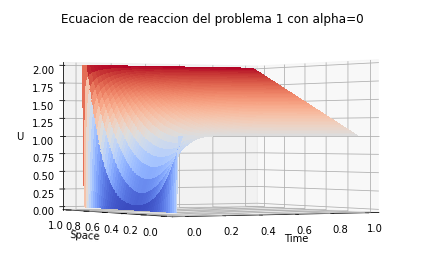

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.title('Ecuacion de reaccion del problema 1 con alpha=0')
ax.view_init(0, -120)
plt.tight_layout()
plt.show()